<a href="https://colab.research.google.com/github/YuHsiH/freecodecamp_ML/blob/main/fcc_ML_classfication_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Dataset:**
The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).
http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68

In [6]:
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans',' fAlpha','fDist','class']
df=pd.read_csv('magic04.data',names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
df['class']=(df['class']=='g').astype(int)

In [8]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


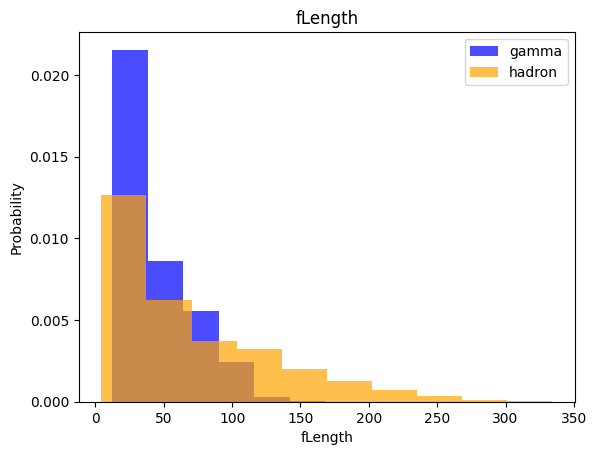

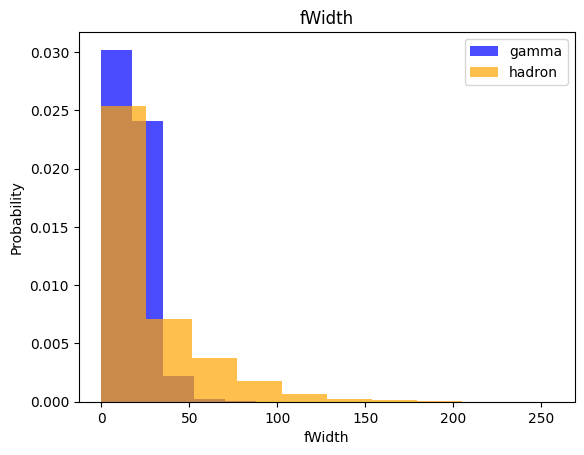

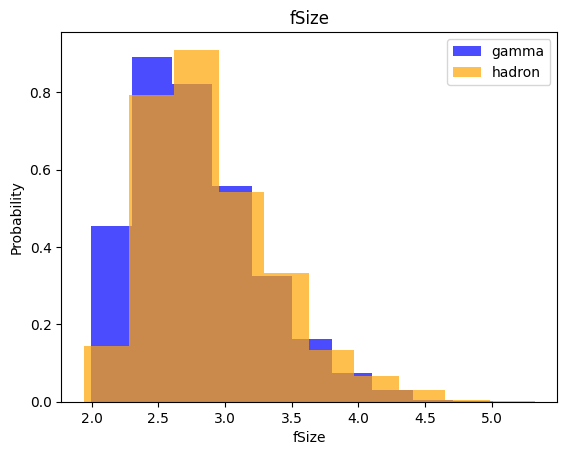

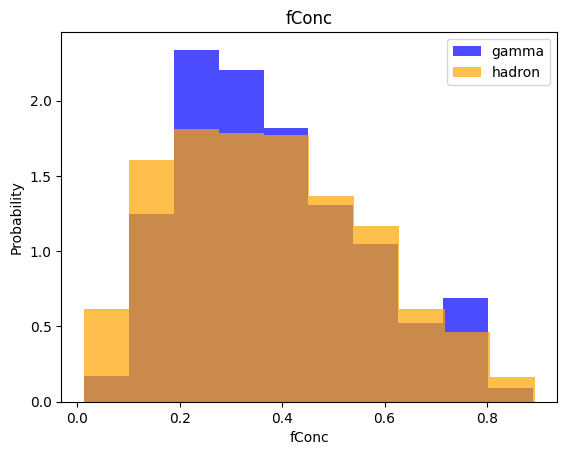

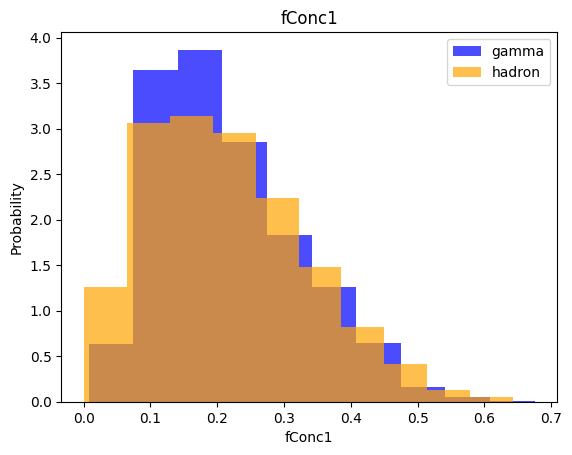

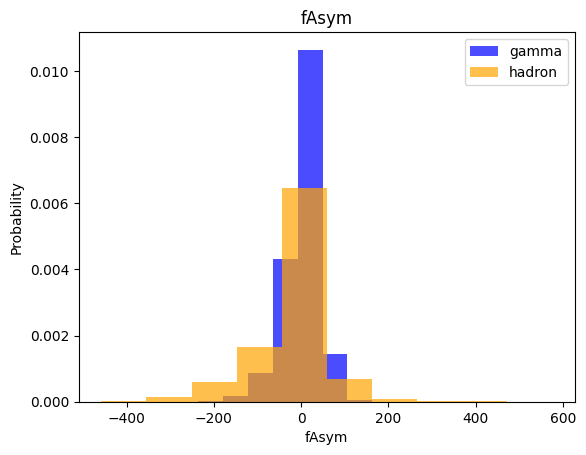

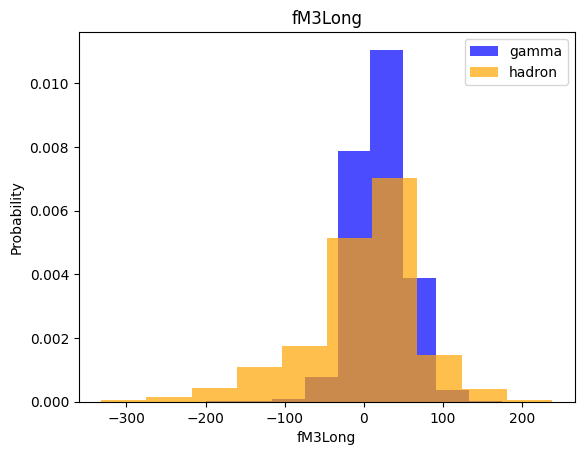

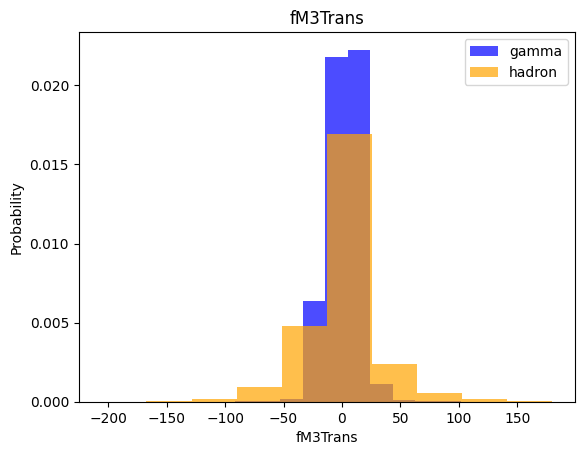

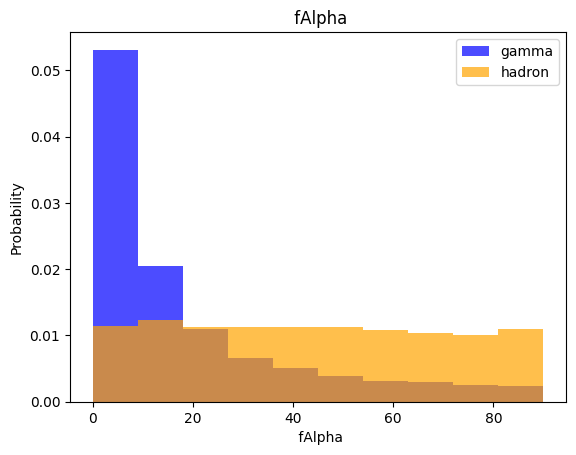

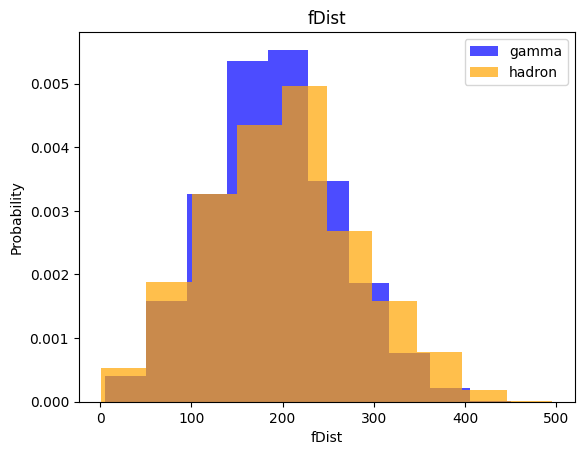

In [16]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label],color='b',label='gamma',alpha=0.7,density=True) #Density to normalise the data so we can compare the g vs h
  plt.hist(df[df['class']==0][label],color='orange',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, validation ,test datasets

In [30]:
#df.sample frac=1 shuffle all data
#train: 1-6, valid=6-8, test=8-10 (60,20,20)
train, valid, test = np.split(df.sample(frac=1),[int((0.6*len(df))),int(0.8*len(df))])

In [31]:
#Normalization
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

def scale_dataset(dataframe, oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  x=scaler.fit_transform(x)

  if oversample:
    ros= RandomOverSampler()
    x, y =ros.fit_resample(x,y)

  #hstack horizontally stack numpy array together
  # (-1,1) = (len(y),1)
  data = np.hstack((x,np.reshape(y,(-1,1))))

  return data, x ,y

In [32]:
print(len(train[train['class']==1])) #gamma
print(len(train[train['class']==0]))
#Samples in two classes are very different -> bias

7345
4067


In [33]:
train, x_train, y_train =scale_dataset(train, oversample=True)
valid, x_valid, y_valid =scale_dataset(valid, oversample=True)
test, x_test, y_test =scale_dataset(test, oversample=True)

# kNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [62]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [63]:
y_pred = knn_model.predict(x_test)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      2485
           1       0.75      0.85      0.80      2485

    accuracy                           0.79      4970
   macro avg       0.79      0.79      0.78      4970
weighted avg       0.79      0.79      0.78      4970



# Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [54]:
y_pre=nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      2485
           1       0.75      0.85      0.80      2485

    accuracy                           0.79      4970
   macro avg       0.79      0.79      0.78      4970
weighted avg       0.79      0.79      0.78      4970



# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [58]:
lg_model=LogisticRegression()
lg_mode= lg_model.fit(x_train, y_train)

In [67]:
y_pred=lg_model.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      2261
           1       0.81      0.75      0.78      2709

    accuracy                           0.77      4970
   macro avg       0.77      0.77      0.77      4970
weighted avg       0.77      0.77      0.77      4970



#Support Vector Machines (SVM)
Not the best model to use if there is an outlier

In [70]:
from sklearn.svm import SVC

In [72]:
svm_model=SVC()
svm_model=svm_model.fit(x_train,y_train)

In [73]:
y_pred=svm_model.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83      2258
           1       0.89      0.81      0.85      2712

    accuracy                           0.84      4970
   macro avg       0.84      0.84      0.84      4970
weighted avg       0.85      0.84      0.84      4970

